# Part-of-speech tagging

Part-of-speech (POS) tagging is the process of labeling each word in a text corpus with its grammatical category, such as noun, verb, or adjective. POS tagging helps machines understand the structure of text, which is useful for tasks like sentiment analysis or text classification. 

In this lab, we will use Python and the pandas library to explore POS tagging techniques and apply them to real-world text data.

Useful nltk PoS documentation - https://www.nltk.org/book/ch05.html

In [1]:
import nltk
import pandas as pd

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Sample text
text = "I like to eat pizza and play video games with my friends."

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)
pos_tags

[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/andy/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('pizza', 'NN'),
 ('and', 'CC'),
 ('play', 'VB'),
 ('video', 'NN'),
 ('games', 'NNS'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('friends', 'NNS'),
 ('.', '.')]

In [2]:
# Convert PoS tags to a DataFrame
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
pos_df.head()

,Word,PoS
0,I,PRP
1,like,VBP
2,to,TO
3,eat,VB
4,pizza,NN


In [3]:
# Count the frequency of each PoS tag and convert it to a dataframe
counts_df = pos_df.groupby('PoS').size().reset_index(name='Count')
counts_df

,PoS,Count
0,.,1
1,CC,1
2,IN,1
3,NN,2
4,NNS,2
5,PRP,1
6,PRP$,1
7,TO,1
8,VB,2
9,VBP,1


Let's look at Jane Austen's Pride and Prejudice

In [4]:
import requests
import string
import pandas as pd

# Pride and Prejudice
book_url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
response = requests.get(book_url)
pride_prejudice = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
pride_prejudice = ''.join(c for c in pride_prejudice if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(pride_prejudice)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)
pos_tags

[('The', 'DT'),
 ('Project', 'NNP'),
 ('Gutenberg', 'NNP'),
 ('eBook', 'NN'),
 ('of', 'IN'),
 ('Pride', 'NNP'),
 ('and', 'CC'),
 ('prejudice', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('This', 'DT'),
 ('eBook', 'NN'),
 ('is', 'VBZ'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('and', 'CC'),
 ('most', 'JJS'),
 ('other', 'JJ'),
 ('parts', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('at', 'IN'),
 ('no', 'DT'),
 ('cost', 'NN'),
 ('and', 'CC'),
 ('with', 'IN'),
 ('almost', 'RB'),
 ('no', 'DT'),
 ('restrictions', 'NNS'),
 ('whatsoever', 'IN'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('it', 'PRP'),
 ('give', 'VB'),
 ('it', 'PRP'),
 ('away', 'RB'),
 ('or', 'CC'),
 ('reuse', 'VB'),
 ('it', 'PRP'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('terms', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Project', 'NNP'),
 ('Gutenberg', 'NN

In [6]:
# Convert PoS tags to a DataFrame
pride_prejudice_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
pride_prejudice_df

,Word,PoS
0,The,DT
1,Project,NNP
2,Gutenberg,NNP
3,eBook,NN
4,of,IN
...,...,...
130455,to,TO
130456,hear,VB
130457,about,IN
130458,new,JJ


### Data frames and plotting
Let's see what the most common 10 nouns in the book are and familiarize ourselves with the use of plots for data visualization.

In [7]:
import matplotlib.pyplot as plt

noun_df = pride_prejudice_df[pride_prejudice_df['PoS'].isin(['NN', 'NNP'])]  # filter to keep only singular nouns
noun_counts = noun_df['Word'].value_counts().head(10)  # count noun occurrences
noun_counts

Mr           805
Elizabeth    596
Darcy        378
Mrs          355
Miss         306
Bennet       306
Jane         270
Bingley      260
time         200
nothing      169
Name: Word, dtype: int64

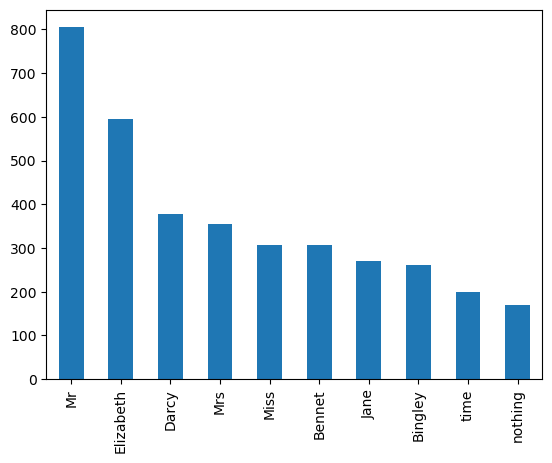

In [8]:
# We'll first plot using the built in pandas plot functionality (still requires the plt dependency for it to work)
noun_counts.plot(kind='bar')  # plot the results
plt.show()

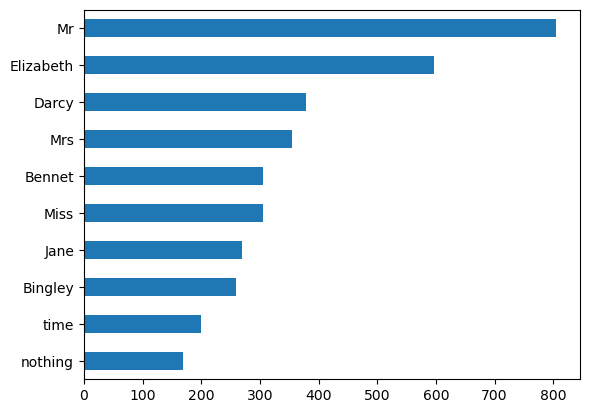

In [9]:
# It feels a bit more natural to visualize the values on the X axis, so we'll slightly tweak the plot parameters
noun_counts_ascending = noun_counts.sort_values(ascending=True) # We sort the values in ascending order first, feels more natural to see the lowest values at the bottom, highest at the top
noun_counts_ascending.plot(kind='barh')  # We use barh instead of bar to switch to horizontal view
plt.show()

Let's switch to a slightly prettier visualization library

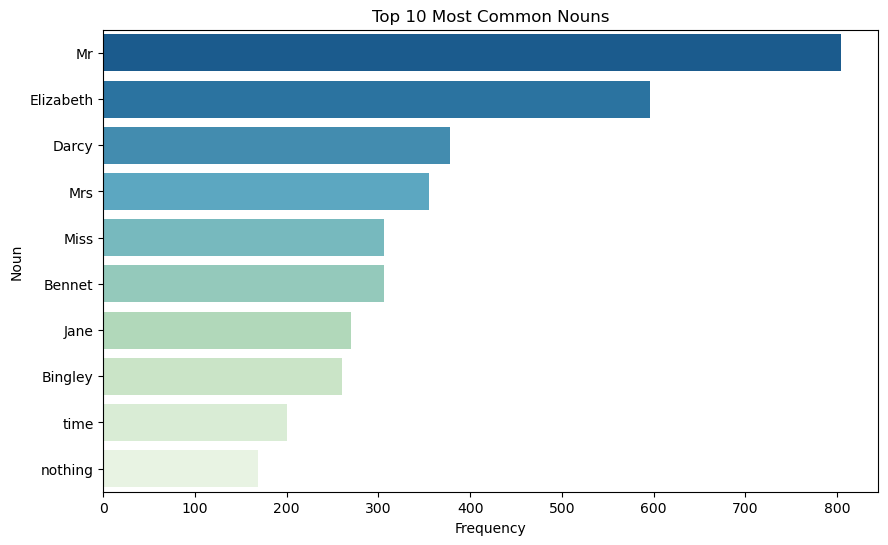

In [11]:
import seaborn as sns

noun_counts_descending = noun_counts.sort_values(ascending=False) # Seaborn plots by default in the opposite order of matplotlib, so for this case we sort the data descending

plt.figure(figsize=(10, 6))
sns.barplot(y=noun_counts_descending.index, x=noun_counts_descending.values, orient='h', color='b', palette='GnBu_r')
plt.title('Top 10 Most Common Nouns')
plt.xlabel('Frequency')
plt.ylabel('Noun')
plt.show()

And let's draw a more serious plot, one showing the most common 10 nouns, verbs, adjectives and pronouns

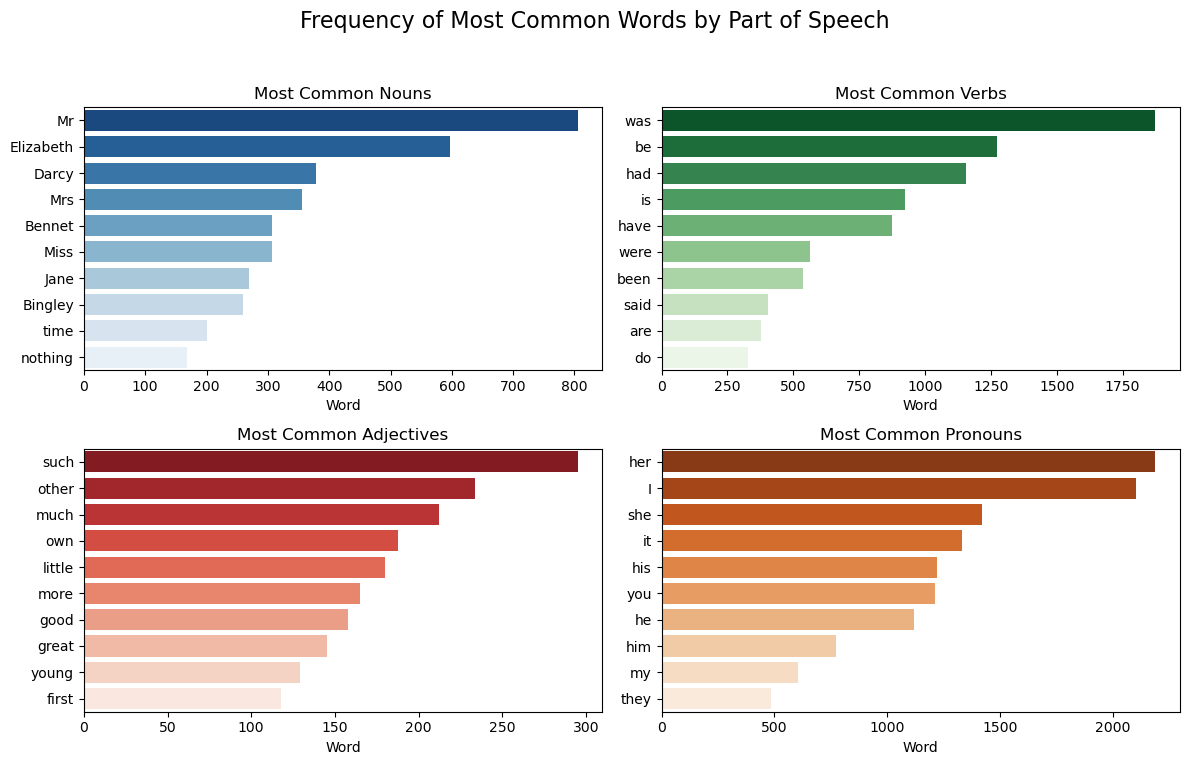

In [12]:
# Count occurrences of each PoS
# We first filter based on PoS, then count the occurrences and keep the top 10
noun_counts = pride_prejudice_df.loc[pride_prejudice_df['PoS'].str.startswith('N'), 'Word'].value_counts().head(10) # all the noun pos tags start with N
verb_counts = pride_prejudice_df.loc[pride_prejudice_df['PoS'].str.startswith('V'), 'Word'].value_counts().head(10)
adj_counts = pride_prejudice_df.loc[pride_prejudice_df['PoS'].str.startswith('JJ'), 'Word'].value_counts().head(10)
pronoun_counts = pride_prejudice_df.loc[pride_prejudice_df['PoS'].str.startswith('PR'), 'Word'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Our figure will be comprised of 2 x 2 subplots
sns.barplot(x=noun_counts, y=noun_counts.index, ax=axes[0, 0], palette='Blues_r') # The x axis will depict the count, the y axis will depict the noun (which is the df index), the palette specifies a blue gradient
sns.barplot(x=verb_counts, y=verb_counts.index, ax=axes[0, 1], palette='Greens_r')
sns.barplot(x=adj_counts, y=adj_counts.index, ax=axes[1, 0], palette='Reds_r')
sns.barplot(x=pronoun_counts, y=pronoun_counts.index, ax=axes[1, 1], palette='Oranges_r')

# Set plot titles
axes[0, 0].set_title('Most Common Nouns')
axes[0, 1].set_title('Most Common Verbs')
axes[1, 0].set_title('Most Common Adjectives')
axes[1, 1].set_title('Most Common Pronouns')

# Set y-axis labels to be more readable
for ax in axes.flat:
    ax.set_ylabel('')

# Set overall plot title and adjust spacing
plt.suptitle('Frequency of Most Common Words by Part of Speech', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Exercise 1

1. Create a dataframe containing the word and PoS tag columns out of two books. You can choose any book you like, but one of them has to be on a scientific (physics, biology, history, geography, etc.) topic, and the other one needs to be a story/novel.

2. Find the most common 10 nouns of each book.

3. Draw the most common 10 nouns of each book inside the same plot.

4. Draw a plot showing the most common 10 nouns, verbs, adjectives and adverbs from one of the two books (you can choose whichever).

In [14]:
# Opticks, by Isaac Newton
book_url = 'https://www.gutenberg.org/cache/epub/33504/pg33504.txt'
response = requests.get(book_url)
newton = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
newton = ''.join(c for c in newton if c in allowed_chars)

# A Journey to the Centre of the Earth, by Jules Verne
book_url = 'https://www.gutenberg.org/cache/epub/18857/pg18857.txt'
response = requests.get(book_url)
verne = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
verne = ''.join(c for c in verne if c in allowed_chars)

In [21]:
newton_df = pd.DataFrame(nltk.word_tokenize(newton), columns=['Word'])
newton_df

,Word
0,The
1,Project
2,Gutenberg
3,EBook
4,of
...,...
103297,to
103298,hear
103299,about
103300,new


### Named Entity Recognition

Named Entity Recognition (NER) is a Natural Language Processing (NLP) technique that involves identifying and classifying named entities in text into predefined categories such as person names, organization names, locations, medical codes, etc. 

The main goal of NER is to extract relevant information about entities from text documents and provide structured information that can be used for various purposes such as information retrieval, question answering, text summarization, sentiment analysis, and more.

Nltk has some built-in NER functionality, but it is slower and relatively old, making it quite far from state of the art. For this reason we are going to use a faster and more power library called **spacy**.

Useful spacy documentation - https://spacy.io/usage/linguistic-features


In [12]:
# Remove comment below if spacy is not installed
# !pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!python -m spacy download en_core_web_lg # Download the large spacy en_core_web model
# Can replace with en_core_web_sm if you have network/cpu bottlenecks

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-21 20:56:29.905554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 20:56:31.334302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-21 20:56:31.334450: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [14]:
import spacy

# Load the pre-trained model
nlp = spacy.load('en_core_web_lg') # Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Take a look at how spacy NER works

In [15]:
# Define the text to be analyzed
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process the text with spaCy
doc = nlp(text)

# Print each token's text and its predicted named entity label
for token in doc:
    print(token.text, token.ent_type_)

Apple ORG
is 
looking 
at 
buying 
U.K. GPE
startup 
for 
$ MONEY
1 MONEY
billion MONEY


Spacy has its own built-in functionality for displaying named entities in a nice way

In [16]:
from spacy import displacy

# Generate a visualization of the named entities in the text
displacy.render(doc, style='ent', jupyter=True)

One simple use case for NER is to automatically redact names. This can prove quite helpful in certain scenarios.

E.g. If you plan to make a large set of documents public and want to comply with GDPR regulations for handling personal data, you may need to remove all the names of individuals mentioned in the documents.



It's not always necessary to use pandas for our data. Sometimes it could be that processing and manipulating the raw data directly is sufficient.

In [17]:
# Define the text to be analyzed
before_text = "John Smith is a software engineer at Google."
after_text = before_text[:]

# Process the text with spaCy
doc = nlp(before_text)

# Iterate over each named entity in the document
for ent in doc.ents:
    # If the named entity is a person or an organization that needs to be redacted
    if ent.label_ == 'PERSON':
        after_text = after_text.replace(ent.text, '[REDACTED]')

print(before_text)
print(after_text)

John Smith is a software engineer at Google.
[REDACTED] is a software engineer at Google.


SpaCy recognizes the following built-in entity types:

    PERSON - People, including fictional.

    NORP - Nationalities or religious or political groups.

    FAC - Buildings, airports, highways, bridges, etc.

    ORG - Companies, agencies, institutions, etc.

    GPE - Countries, cities, states.

    LOC - Non-GPE locations, mountain ranges, bodies of water.

    PRODUCT - Objects, vehicles, foods, etc. (Not services.)

    EVENT - Named hurricanes, battles, wars, sports events, etc.

    WORK_OF_ART - Titles of books, songs, etc.

    LAW - Named documents made into laws.

    LANGUAGE - Any named language.

    DATE - Absolute or relative dates or periods.

    TIME - Times smaller than a day.

    PERCENT - Percentage, including "%".

    MONEY - Monetary values, including unit.

    QUANTITY - Measurements, as of weight or distance.

    ORDINAL - "first", "second", etc.

    CARDINAL - Numerals that do not fall under another type.

### Exercise 2 - Play a game with your colleagues

Find a wikipedia (preferably English) article about a famous person, character, organization or  event of your choice.


**Redact all the persons from the page. Redact all the entities of an additional type of your choice besides persons.**


Show the final (redacted) text to a colleague and see if they can tell who the wiki page is about.

Below you have an example of how to get a wikipedia article based on id and access its content.

In [18]:
# We'll use the wikipedia python package to get our page
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=bd8b5ed91bf16b7308e28e36960b69aa0b0172730351092449ef449bff643fe4
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


In [19]:
import wikipedia

# Fetch the page with the ID "423943"
page = wikipedia.page(pageid='423943') # You can find a page's id by going to the menu in the top left, then going to Page Information

content = page.content
content[:200]

'The rhesus macaque (Macaca mulatta), colloquially rhesus monkey, is a species of Old World monkey. There are between six and nine recognised subspecies that are split between two groups, the Chinese-d'

In [20]:
# Write your code below


### Spacy tagging
Once we process a text using spacy, the named entities are not the only information we receive.

We can access a text's named entities using doc.ents() to receive a list of entities, but we also have information stored in each of the doc's tokens.

Some of the most commonly used annotations that are available in the Doc object include:

    Token.text: the original text of the token

    Token.lemma_: the base form of the token

    Token.pos_: the part of speech tag for the token (e.g., "NOUN", "VERB", "ADJ")

    Token.tag_: the detailed part of speech tag for the token (e.g., "NN", "VBD", "JJ")

    Token.dep_: the syntactic dependency label for the token (e.g., "nsubj", "dobj", "pobj")

    Token.is_stop: a boolean indicating whether the token is a stop word or not

Spacy's dependency parsing can be used to extract specific information from a text, such as the subject and object of a sentence or the relationship between two entities. This information can be used to extract structured data from unstructured text, which can be useful for tasks such as question answering, knowledge graph construction, and more.

Let's look at an example of the dependencies from a sentence.

In [21]:
sentence = "The cat sat on the mat."

doc = nlp(sentence)

for token in doc:
    print(token.text, token.dep_, token.head.text)

The det cat
cat nsubj sat
sat ROOT sat
on prep sat
the det mat
mat pobj on
. punct sat


Spacy provides functionality for visualizing these dependencies in a more appealing manner using displacy.

In [22]:
sentence = "The cat sat on the mat."

doc = nlp(sentence)

displacy.render(doc, style="dep", options={"compact": True}, jupyter=True)

### Question asking

We'll get creative and try to write some code that can automatically transform sentences into questions.

We're gonna write a naive function using scipy functionality.

In [23]:
def generate_question(sentence):
    # process the input sentence
    doc = nlp(sentence)
    # extract the subject, verb, and object of the sentence
    subject = None
    verb = None
    obj = None
    for token in doc:
        if token.dep_ == "nsubj":
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.lemma_ # We want the basis of the word, the lemma - "what did he <eat>?" not "what did he <ate>?"
        elif token.dep_ == "dobj":
            obj = token.text

    # generate a question based on the extracted information
    if subject is not None and verb is not None:
        if obj is not None:
            question = f"What did {subject} {verb}?"
        else:
            question = f"What {verb} {subject} do?"
        return question
    else:
        print("No subject or verb found")
        return None

# example usage
input_sentence = "Michael sent her flowers"
question = generate_question(input_sentence)
print("Generated question:", question)

Generated question: What did Michael send?


### Exercise 3 Q & A


1. Create a model that is able to answer simple "Who [verb]?" questions. 

    For this, write a function that takes as input a context string and a question string and returns the answer to the question or a message error as output.

        e.g. context - "I can't sleep. Rex barks loudly. He is scared."
        question - "Who barks?" 
        output - "Rex" or "Rex"

        question - "Who is scared?"
        output - "He"

2. Write a sentence of your own, generate the question for it using generate_question() and then answer it using your find_answer() function and the context of your initial sentence.


In [24]:
# Write your code below
def find_answer(context, question):
    return "I don't know"

# example usage
context = "I can't sleep. Rex barks loudly. He is scared."
question = "Who can't sleep?"
answer = find_answer(context, question)
print("Answer:", answer)

Answer: I don't know


### Exercise 4 - Fake News Generator

Somewhat similarly to exercise 2, next up you will be creating a naive fake news generator.

1. Create a function that takes as input a text, **replaces all the person names with a randomly selected name coming from an input list of names** and then returns the modified text. 

    (E.g. can give input_list = ['Barack Obama', 'Donald Trump', 'Bill Gates'] or can also give a list with one element, case in which that's what will always be picked by the random function) 
2. Create a function that takes as input a text, **replaces all the dates with other randomly generated dates** and then returns the modified text.

3. **Apply both of these functions (in sequence)** on a news article of your choice from the brown corpus of text.

In [25]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

# Helper function to join words from brown corpus
def join_words(words):
    text = ''
    for word in words:
        if word in {'.', ',', ';', ':', '?', '!', '(', ')', '``', "''", '--'}:
            text = text.rstrip() + word + ' '
        else:
            text += word + ' '
    return text.strip()

# List of categories in the Brown Corpus
print("Categories", brown.categories())

# Accessing tokenized words
govt_documents = brown.fileids(categories='news')
words = brown.words(govt_documents[0])

# Joining words to form a text
text = join_words(words)
print("Text: ", text)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Categories ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
Text:  The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced`` no evidence'' that any irregularities took place. The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election,`` deserves the praise and thanks of the City of Atlanta'' for the manner in which the election was conducted. The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible`` irregularities'' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr..`` Only a relative handful of such reports was received'', the jury said,`` considering the widespread interest in the election, the number of voters and the size of this city''. The jury sa

In [ ]:
# Write your code below


### Exercise 5 - Dataframes

1. Create a dataframe from 4 books or documents of your choice (documents should have >5000 words). The dataframe should contain the book, word, NER and PoS columns. NER column will contain the **entity type** of the word (e.g. person, date) obtained using spacy, PoS column will contain the **PoS tag** of the word (e.g. verb, noun) obtained using spacy or nltk.

2. Display a table showing the distribution of word appearances for each entity type (word count / entity).

3. Draw a pie or bar chart to help visualize the above distribution.

4. Display a table showing the distribution of word appearances for each PoS (word count / PoS).

5. Draw a pie or bar chart to help visualize the above distribution.

In [ ]:
# Write your code below
